<div style="text-align: right">© Moon</div>

# Project Report: Evaluation of the Centrality Algorithm, PageRank (Second Edition)
***

## Introduction

[1]The trillion dollar algorithm called, $PageRank(PR)$, is used in Google Search to rank web pages that Google's founders Sergey Brin and Larry Page developed in 1998. The PageRank algorithm measures the importance of a webpage by analyzing the quantity and quality of the links that point to it. The PR is an important member of centrality algorithms, graph algorithms. They identify the important nodes in a given graph and those nodes are defined as vertices with many direct or indirect connections. $PageRank(PR)$ finds most important vertices of a graph by analyzing the direct influence of nodes based on proportional rank.
 
In this notebook, we will demonstrated about the concepts of PageRank algorithm and its theoretical and empirical complexity.

This notebook demonstrates:
- The Concept of PageRank algorithm
- Implementation the PageRank algorithm and explore it on various graphs generated from Networks, python library.
- Measuring the PR complexity theoretically
- Measuring the PR complexity empirically
- PR algorithm and adjusting limitations

***

## The PageRank Algorithm

[2]The PageRank algorithm gives each page a rating of its importance, which is a recursively defined measure where by a page becomes important if important pages link to it. The page rank of any page is the probability that the random surfer will land on a particular page that the surfer is more likely to end up in important pages.

The page rank of any page is the probability that the random surfer will land on a particular page that the surfer is more likely to end up in important pages. The behavior of the random surfer is an example of a Markov process, which depends only of the current state of a system. The algorithm moves moves from state to state, based on probability distribution of the likelihood of moving from each state to every other possible state. 

### PageRank Mathematical Formula

The PageRank relies on an arbitrary probability distribution in which a person randomly clicks on links will arrive at any particular page. The probability which a person independently will continue is a damping factor $d$. PR computations require iterations through a number of pages to adjust approximate PR values to the theoretical value. The pageRank equation iteratively updates a candidate solution (rank) and arrive (converges) at an approximate solution to the same equation.

> <br>
>
> let $G = (V, E)$ be a directed graph with the set of vertices $V$ and set of edges $E$, where $E$ is subset of $V$ x $V$.
>  <br>
> Then The iteration equation of the page rank value of  $(V_i)$  is given by:
>
>$PR(V_i)$ = $(1 - d)$ + $d$ * $\sum_{n=In(Vi)}^{} PR(Vn) \over |Out(Vn)|$ <br>
<br>
> = $(1 - d)$ + $PR(V_1) \over Out(V_1)$ + ... + $PR(V_n) \over Out(V_n)$ 
>
> <br>

>   <br>
> where,
>
>- $In(V_i)$ be predecessors, set of vertices point to it; node (page) $(V_i)$ has nodes $(V_i)$ to $(V_n)$ point to it
>- $Out(V_i)$ be successors, the set of vertices that vertex $(V_i)$ points to; defined as the number of links going out of page $V$
>- $d$ is a damping factor which can be set between 0 (inclusive) and 1 (exclusive)
>- $\frac{d}{n}$ denotes random walk score
>   <br>
>   <br>

[1]The result of $PR(V_i)$ 0.4 for instance, means there is 40% chance that a person randomly surf will be directed to the node. The implementation of the classic PageRank algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed.

## UPDATED: PageRank Challenges
***


### Limitations of the Early PageRank 

In the early PageRank, there limitations:
- [5]Rank Sinks: A rank sink occurs when a page does not link out. Rank sinks occurs when by refusing to share. 

- [5]Hoarding: a group of pages that only link between each other will also monopolize PageRank, creating error. 

- [5]Circular references: A couple of pages that only link between themselves and do not link to any other page. The iterative process will never converge, creating infinity loop.

### Adjustment for PR limitations

#### First adjustment: Stochasticity Adjustment
[5]The PageRank equation computation requires summations which takes more computation time. To save the time, we can uses matrices to convert summations n to simpler vector-matrix multiplication, which saves computation time. Matrices also take advantage of matrix algebra and Markov Chains theory. The value (0 or 1) indicates whether or not there is a link between the pages. Instead of using 1 to indicate a link, we use 1/x, where x is the number of non-zero elements in each row. This strategy turns the non-zero values into probabilities, and creates a row substochastic matrix. When we add the values of each row, some of the totals will equal 1 and the rest will equal zero. The zero totals happen because of the dangling nodes or rank sinks. For a row stochastic matrix all the rows must add up to 1. Leaving the matrix unmodified does not guarantee that the values will converge during iterations. The first adjustment replaces all zero rows (dangling nodes/rank sinks) with 1/n eT (eT is a row vector of all 1s), making the matrix stochastic.

#### Second adjustment: Primitivity Adjustment
[14]Applying the Power Method to a Markov matrix converges to a unique solution if the matrix is stochastic, irreducible, and irregular. The primitive adjustment can be thought of as a random surfer. A proportion of the time the user will be following links at random and a proportion of the time the user visits new URL in stead of going to following links. In order to model this mathematically, d (damping factor), it means that 85% of the time the surfer is following links at random, and 15% of the time he is entering new URLs in the browser bar. A new matrix is used for this adjustment and random surfer is uniform.


For each node take the difference in PR score between the current iteration and the last iteration, if this error falls below a certain point the graph has converged. Starting from arbitrary values assigned to each node in the graph, the computation iterates until convergence below a given threshold is achieved.

[6]Convergence is achieved when the error rate for any vertex in the graph falls below a given threshold value. The error rate of a vertex computed by difference between the “real” score of the vertex PR(Vi) and the score computed at iteration I, PR^I(Vi) . The error rate is approximated at PR^(I+1)(Vi)+ PR^(I)(Vi). The computation of PR has no issue, if disregard scales. As damping factor increases, the rate of convergence also increases.


***

## Implementation of The PageRank Algorithm

### Assumption & Consideration
- we will set damping factor to 0.85 and iterations to 100.
- The PageRank algorithm was designed for directed graphs and our algorithm will automatically check and convert them into undirected graphs.
- personalization vector: importance of node including dangling node (node without any edges) or edge is uniform distribution
- Each weight of node is set to 1
- We will use $eigenvector calculation$. The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. The iteration will stop after an error tolerance of len(G) * tol has been reached. If the number of iterations exceed iterations(I), it will print error message.

### PageRank Algorithm Steps

1. Convert graphs into directed graphs
2. Initialize the PageRank of every page (node) with an inital rank of 1/n
3. Update the rank of each page by adding up the weight of every page that links to it divided by the number of links emanating from the referring page.
4. If a page has no outward links (dangling nodes), redistribute its rank equally among the other pages in the graph
5. Iterate through the graph. For each iteration, update the PageRank of every node in the graph. Add a damping factor at each stage to model the fact that users stop searching. 
   1. For the first page, it only processes through random walk. 
   2. For other pages, they can process through random walk or inter-page links. 
   3. Sum up the proportional rank from all of its in-neighbors
   4. Update the PageRank with the weighted sum of proportional rank and random walk
6. Normalize the PageRank when there is terminal point. PageRank value will converge after enough iterations
7. Return PR scores

## Parameters

| **Input Argument** | **Type** | **Comment**                                       | 
|--------------------|----------|---------------------------------------------------|
| G                  | graph    | input graph; Undirected graphs will be converted to a directed graph with two directed edges for each undirected edge. |
| n                  | int      | total number of nodes of given graph (G)          |     
| d                  | float, optional    | damping factor; the probability of random walk; default=0.85.                                   |
| I                  | int, optional    | the number of iteration; Maximum number of iterations in power method; default=100 eigenvalue solver.                       |
| tol | float | Error tolerance used to check convergence in power method solver.



In [13]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random
from warnings import warn
import networkx as nx
from time import perf_counter
from random import randint
%matplotlib inline

In [14]:
def pageRank(G, d=0.85, I=100, tol=1.0e-6, weight="weight"):
    
    if len(G) == 0:                                         # O(1) - edge case; check if graph is None
            return {}

    D = G.to_directed()                                     # O(n + m) - traverse all nodes; graph conversions; n => num of nodes; m => num of edges

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight)                      # O(n^2) - build a matrix size of n^2; assign value
    # get total number nodes of graph
    N = W.number_of_nodes()                                 # O(1) - call stochastic_graph function which compute the number of nodes       
    
    # Initialize the PageRank of every node with a value of 1/n 
    PR = dict.fromkeys(W, 1.0 / N)                          # O(n) - build dictionary size of n; assign weight
    
    # Assign uniform personalization vector
    p = dict.fromkeys(W, 1.0 / N)                           # O(n) - build dictionary size of n; assign weight
    
    # Set dangling_weights to persolization vector
    dangling_weights = p                                     # O(1) - assign variable
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]    # O(n) building array
    
    # power iteration: make up to I iterations                          # Total O(I * n^2)   
    for _ in range(I):                                                  # O(I) - iteration step 
        PRlast = PR                                                     # O(1) - assign variable
        PR = dict.fromkeys(PRlast.keys(), 0)                            # O(1) - update variable
        danglesum = d * sum(PRlast[n] for n in dangling_nodes)          # O(1) - assign value & computation
        
        for n in PR:                                                    # O(n)
            for _, nbr, wt in W.edges(n, data=weight):                  # * O(n) - matrix computation
                PR[nbr] += d * PRlast[n] * wt                           # O(1) - computation & update variable
            PR[n] += danglesum * dangling_weights.get(n, 0) + (1.0 - d) * p.get(n, 0)       # O(1) - assign value & computation
            
        # check convergence
        err = sum(abs(PR[n] - PRlast[n]) for n in PR)                   # O(1) - assign value & computation
        if err < N * tol:                                               # O(1) - comparison
            print('Convergence Test Passed!')                           # O(1) - print message
            return PR                                                   # O(1) - return value
    
    print('convergence failed')                                         # O(1) - print message
    

# Convergence Test

The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. Our PR script (I=100, d = 0.85) include convergence test and will test our sample data by calling PR. In this study, we will six different graphs generated from neworkx library. Graphs include path graph, directed graph, undirected graph and three different social network graphs.



### Samples Description Chart

| **Notation** | **Type of Graph** | **Comment**                                       | 
|--------------------|----------|---------------------------------------------------|
| G1                  | path graph    | [8]path graph linearly connected nodes.; ```nx.DiGraph(nx.path_graph(m))``` |
| G2                  | a scale-free directed graph      | [9]used in previous project; `nx.scale_free_graph(n)`
| G3                  | undirected graph  | [10] returns the Margulis-Gabber-Galil undirected MultiGraph on n^2 nodes.; regular with degree 8. Nodes are integer pairs. The second-largest eigenvalue of the adjacency matrix of the graph is at most 5 sqrt{2}, regardless of n.; `nx.margulis_gabber_galil_graph(6)`| 
| G4                  | weighted graph   | [11]Returns Zachary's Karate Club graph; has Each node in the returned graph has a node attribute 'club' tha t indicates the name of the club to which the member represented by that node belongs, either 'Mr. Hi' or 'Officer'. Each edge has a weight based on the number of contexts in which that edge's incident node members interacted.; `nx.karate_club_graph()`|  
| G5 | biparitite graph | [12]Returns Davis Southern women social network. This is a bipartite graph.; `nx.davis_southern_women_graph()` | 
| G6 | weighted graph | [13]florentine_families_graph(): Returns Florentine families graph.; `nx.florentine_families_graph()`


#### Sample Information

In [15]:
# Size of samples

G1 = nx.DiGraph(nx.path_graph(36))
G2 = nx.scale_free_graph(36)
G3 = nx.margulis_gabber_galil_graph(6)
G4 = nx.karate_club_graph()
G5 = nx.davis_southern_women_graph()
G6 = nx.florentine_families_graph()

Samples = [G1, G2, G3, G4, G5, G6]

# return graph sample's nodes & edges
for G in Samples:
    print(G) 


DiGraph with 36 nodes and 70 edges
MultiDiGraph with 36 nodes and 68 edges
MultiGraph named 'margulis_gabber_galil_graph(6)' with 36 nodes and 144 edges
Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Graph with 32 nodes and 89 edges
Graph with 15 nodes and 20 edges


#### Sample Convergence Test Results

In [16]:
# Convergence Test
for num, G in enumerate(Samples, 1):
    print('Sample Graph {num} Test Result:'.format(num=num))
    pageRank(G)
    print()

Sample Graph 1 Test Result:
Convergence Test Passed!

Sample Graph 2 Test Result:
Convergence Test Passed!

Sample Graph 3 Test Result:
Convergence Test Passed!

Sample Graph 4 Test Result:
Convergence Test Passed!

Sample Graph 5 Test Result:
Convergence Test Passed!

Sample Graph 6 Test Result:
Convergence Test Passed!



***

## Theoretical Analysis

Refer to the PageRank algorithm and the script in the previous cells. <br>
The implementation of above PR algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed. <br>

#### Time Complexity
The time complexity depends on $I$, number of iterations and $N$, total number of nodes. <br>
The algorithm starts by checking all nodes and edges to convert them into directed graph which is O(N + M)
The main loop runs $I$ times, which is total number of iteration. <br>
The inner loop runs $N$ times, which is the number of nodes generated <br>
The matrix multiplication runs $N^2$ Times

The time complexity’s value is $O(I * N^2)$ where I represents the specific number of iterations that needs to be run on node N. 

#### Space Complexity
We use space to return pageRank value which is $O(N)$ where $N$ is total number of nodes. We also use a stochastic matrix which is $O(N^2)$. <br>
Therefore, the total space complexity’s value is $O(N^2)$

***

## Empirical Time Complexity

The empirical time analysis function takes number of nodes, pageRank function, and graph generation function.
We will use the time.perf_counter to measure time and use a log scale plot to show small variations at a detailed level.

In [17]:
# Disable printing convergence test result
import os
import sys

# Disable printing convergence test result
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

def measure_cost(G, pageRank):
    t = []
    PR = None
    num_nodes = nx.number_of_nodes(G)
    
    for n in range(num_nodes):
        runs = []
        st = perf_counter()
        for i in range(n):
            # Disable printing convergence test result; only time will return
            with HiddenPrints():
                PR = pageRank(G)
            runs += [perf_counter()-st]
        t += [np.mean(runs)]
    

    print('clock: ', ' '.join(['{:g}'.format(v) for v in t]))
    # PR dataset can be used for search
    return t, PR, num_nodes
    # return t, num_nodes


'''
[5]E. Guven, module05_ds, Jhu.edu. (2022).<br> https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).<br>
'''

'\n[5]E. Guven, module05_ds, Jhu.edu. (2022).<br> https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).<br>\n'

In [18]:
# Find time 
t1, PR1, num_nodes1 = measure_cost(G1, pageRank)
t2, PR2, num_nodes2 = measure_cost(G2, pageRank)
t3, PR3, num_nodes3 = measure_cost(G3, pageRank)
t4, PR4, num_nodes4 = measure_cost(G4, pageRank)
t5, PR5, num_nodes5 = measure_cost(G5, pageRank)
t6, PR6, num_nodes6 = measure_cost(G6, pageRank)

total_time1 = t1[-1]
total_time2 = t2[-1]
total_time3 = t3[-1]
total_time4 = t4[-1]
total_time5 = t5[-1]
total_time6 = t6[-1]

/Users/Moon/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Moon/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


clock:  nan 0.0127314 0.0166462 0.0227445 0.0399368 0.0672606 0.0447402 0.0468606 0.0520019 0.0559123 0.0589514 0.0636656 0.0700691 0.0734118 0.080463 0.090572 0.102432 0.0985206 0.104766 0.10597 0.111963 0.122827 0.122735 0.135716 0.142621 0.138756 0.146884 0.156898 0.158952 0.162265 0.189485 0.172201 0.173335 0.18869 0.187617 0.202407
clock:  nan 0.00448069 0.00629697 0.0141937 0.0237911 0.0128559 0.0143735 0.0156246 0.0180574 0.0201836 0.0228817 0.0239337 0.0257135 0.0277156 0.0294414 0.0322373 0.0374465 0.0369721 0.0383381 0.0424279 0.040601 0.0423784 0.0448778 0.0474124 0.0479967 0.054387 0.054806 0.066129 0.057732 0.0655722 0.0623011 0.0619543 0.0661109 0.0681921 0.0793907 0.0715484
clock:  nan 0.00802182 0.0109394 0.0147784 0.0194086 0.0227618 0.0261787 0.0293409 0.0354632 0.0374657 0.0458722 0.0602486 0.074541 0.0582452 0.0580296 0.063597 0.0642406 0.0669035 0.0743853 0.0940721 0.0903924 0.0905571 0.0919118 0.0935602 0.132852 0.100838 0.106497 0.110215 0.112614 0.118578 0.11919

***

In [1]:
# G4, G5, G6 have less than 36 nodes. In order to visualize data, we adds None value
def resize(t):
    t = t
    diff = 36 - len(t)
    for i in range(diff):
        t.append(np.nan)
    return len(t)
        
resize(t4)
resize(t5)
resize(t6)

NameError: name 't4' is not defined

'\nReferences\n----------\n[5]E. Guven, module05_ds, Jhu.edu. (2022).\nhttps://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).\n'

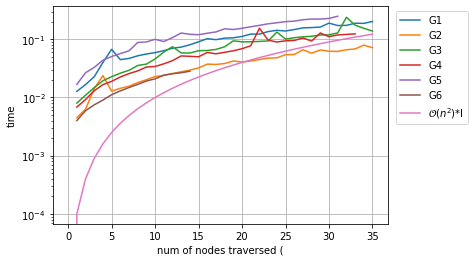

In [20]:
# Plot
# {'Graph size $n$': [n for n in range(25)],
df = pd.DataFrame( {'G1': t1,
                   'G2': t2,
                   'G3': t3,
                   'G4': t4,
                   'G5': t5,
                   'G6': t6,
                   '$\mathcal{O}(n^2)$*I':     [100 * 1e-6*n**2 for n in range(36)],
                #    '$\mathcal{O}(n^2)$':     [1e-6*n**2 for n in range(36)],
                   })

# df.set_index('Graph size $n$', drop=True, inplace=True)

fig = df.plot().get_figure()

plt.legend(bbox_to_anchor=(1.01, 1.0))
plt.ylabel('time')
plt.grid()
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('num of nodes traversed (')

# fig.savefig('page_Rank_01.png')
'''
References
----------
[5]E. Guven, module05_ds, Jhu.edu. (2022).
https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).
'''


### Samples Description Chart

| **Notation** | **Type of Graph** | **num of nodes** | **num of edges** | **Comment**                                       | 
|--------------------|----------|-|-|---------------------------------------------------|
| G1                  | path graph    | 36 |70| [8]path graph linearly connected nodes.; nx.DiGraph(nx.path_graph(4)) |
| G2                  | a scale-free directed graph      |36|78| [9]used in previous project; nx.scale_free_graph(n)
| G3                  | undirected graph  |36|144| [10] returns the Margulis-Gabber-Galil undirected MultiGraph on n^2 nodes.; regular with degree 8. Nodes are integer pairs. The second-largest eigenvalue of the adjacency matrix of the graph is at most 5 sqrt{2}, regardless of n.                             |
| G4                  | weighted graph   | 34 | 78 | [11]Returns Zachary's Karate Club graph; has Each node in the returned graph has a node attribute 'club' tha t indicates the name of the club to which the member represented by that node belongs, either 'Mr. Hi' or 'Officer'. Each edge has a weight based on the number of contexts in which that edge's incident node members interacted.|  
| G5 | biparitite graph | 32 | 89 | [12]Returns Davis Southern women social network. This is a bipartite graph. | 
| G6 | weighted graph |15 |20 |[13]florentine_families_graph(); Returns Florentine families graph.


***

'\nReferences\n----------\n[5]E. Guven, module05_ds, Jhu.edu. (2022).\nhttps://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).\n'

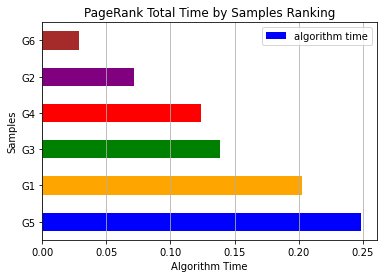

In [21]:
# We stored total time before resizing (adding non values for comparison purpose) G4, G5, G6 
'''
total_time1 = t1[-1]
total_time2 = t2[-1]
total_time3 = t3[-1]
total_time4 = t4[-1]
total_time5 = t5[-1]
total_time6 = t6[-1]
'''

# Plot
# Time Rank using

# from operator import index
from turtle import color
df = pd.DataFrame(
{'Samples':['G1', 'G2', 'G3', 'G4', 'G5', 'G6'],
               'algorithm time': [total_time1, total_time2, total_time3, total_time4, total_time5, total_time6]}
                  )


# df.plot.barh()
sorted_values = df.sort_values(by='algorithm time', ascending=False)
ax = sorted_values.plot.barh(x='Samples', y='algorithm time', color=[
                             'blue', 'orange', 'green', 'red', 'purple', 'brown'], mark_right=True)

plt.xlabel('Algorithm Time')
plt.grid(axis='x')
plt.title('PageRank Total Time by Samples Ranking')

'''
References
----------
[5]E. Guven, module05_ds, Jhu.edu. (2022).
https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).
'''


***

# Conclusion

The importance of a Web page is subjective which depends on users interests and backgrounds. However, using pageRank algorithm, it can measures relative importance of Webpages. 

In this study, we briefly demonstrated about PageRank algorithm and its theoretical and empirical complexity. PageRank algorithms are important members of centrality algorithms which identify most important vertices of a graph by measuring the direct influence of nodes based on proportional rank.

We examined the PageRank algorithm. We empirically showed that the algorithm can run in $O(N^2 * I)$ time where $N$ represents total number of nodes given graph and $I$ represents iterations.

***

## References


[1]Wikipedia Contributors, PageRank, Wikipedia. (2022).<br> https://en.wikipedia.org/wiki/PageRank (accessed July 24, 2022).<br>
<br>
[2]Graph generators — NetworkX 2.8.5 documentation, Networkx.org. (2019).<br> https://networkx.org/documentation/stable/reference/generators.html (accessed July 24, 2022).<br>
<br>
[3]pagerank — NetworkX 2.8.5 documentation, Networkx.org. (2022).<br> https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html (accessed July 24, 2022).<br>
<br>
[4]L. Page, S. Brin, R. Motwani, T. Winograd, The PageRank Citation Ranking: Bringing Order to the Web. - Stanford InfoLab Publication Server, Stanford.edu. (1999).<br> https://doi.org/http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf.<br>
<br>
[5]E. Guven, module05_ds, Jhu.edu. (2022).<br> https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).<br>

[6]R. Mihalcea, P. Tarau, TextRank: Bringing Order into Texts, n.d.<br> https://digital.library.unt.edu/ark:/67531/metadc30962/m2/1/high_res_d/Mihalcea-2004-TextRank-Bringing_Order_into_Texts.pdf.

[7]
path_graph — NetworkX 2.8.5 documentation, Networkx.org. (2022).<br> https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html#networkx.generators.classic.path_graph (accessed July 26, 2022).<br>

[8]
path_graph — NetworkX 2.8.5 documentation, Networkx.org. (2022).<br> https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html#networkx.generators.classic.path_graph (accessed July 26, 2022).<br>

[9]
scale_free_graph — NetworkX 2.8.5 documentation, Networkx.org. (2022). https://networkx.org/documentation/stable/reference/generated/networkx.generators.directed.scale_free_graph.html (accessed July 26, 2022).<br>

[10]
karate_club_graph — NetworkX 2.8.5 documentation, Networkx.org. (2022).<br> https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html#networkx.generators.social.karate_club_graph (accessed July 26, 2022).<br>

[11]
karate_club_graph — NetworkX 2.8.5 documentation, Networkx.org. (2022).<br> https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html#networkx.generators.social.karate_club_graph (accessed July 26, 2022).<br>

[12]
davis_southern_women_graph — NetworkX 2.8.5 documentation, Networkx.org. (2022)<br>. https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.davis_southern_women_graph.html (accessed July 26, 2022).<br>

[13]
florentine_families_graph — NetworkX 2.8.5 documentation, Networkx.org. (2022).<br> https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.florentine_families_graph.html (accessed July 26, 2022).<br>

[14]
B. Ali, School of Education, Culture and Communication Division of Applied Mathematics MASTER (1 YEAR) THESIS IN MATHEMATICS / APPLIED MATHEMATICS<br> A comparison of a Lazy PageRank and variants for common graph structures, n.d.<br> https://mdh.diva-portal.org/smash/get/diva2:1179590/FULLTEXT01.pdf.<br>

    


# function => outside of classes
# methods are part of class

In [1]:
import json
# function: saves in data in JSON for
# convert json => python string format
def dump_json(outfile_name, result):
    with open(outfile_name, 'w') as outfile:
        outfile.write(json.dumps(result, indent=4, separators=(',', ': ')))
        
# Convert Python String into Json format
def load_json(file_name):
    # open the file and save it as f
    with open(file_name) as f:
        # using json 
        return json.loads(f.read())

# string form to class dictionary
json_string = '''
{"students": [ {"id":1,"name": "Tim","age": 21
}, {"id":2,"name": "Randy","age": 22}]
}
'''
print(json_string, "type of the json_string is: ", type(json_string))
# loading json files
#json. load string() converts string to json form
data = json.loads(json_string)

print(data, 'type is', type(data))
print(data['students'][1]["name"])

# given json and after editing, convert to in to python string form

json_string = '''
    {
        "students": [
            { "id": 1, 
            "name": "Moon",
            "full-time": false },
            
            {
                "id": 2,
                "name": "Kim",
                "full-time": true 
            }
        ]
    }
'''

# load the string into json
json_format = json.loads(json_string)
print(json_format)
json_format["students"][0]["name"] = "King the Moon"
print(json_format)

# convert to json string
# dump String
# we can pass identation
# can also sort
reverse_json_to_string = json.dumps(json_format, indent=2, sort_keys=True)

print(reverse_json_to_string)
